In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage as ndi
import imageio.v3 as iio
%matplotlib widget

# Attenuation-based X-ray imaging

X-rays have been used for imaging from their very discovery by Wilhelm Röntgen in late 1895. More than 125 years later, X-ray imaging is still conducted in the same way as Röntgen's first experiments (in broad terms). Conventional attenuation-based X-ray imaging is a fine starting point to get acquainted with the fundamentals of X-ray physics.


```{figure} https://upload.wikimedia.org/wikipedia/commons/8/84/X-ray_by_Wilhelm_R%C3%B6ntgen_of_Albert_von_K%C3%B6lliker%27s_hand_-_18960123-01.jpg
---
height: 300px
name: fig:xray-hand
---
An early X-ray radiograph produced by Wilhelm Röntgen
```

Conventional X-ray contrast comes from the inhomogeneity in attenuating properties of materials.


## X-ray absorption and X-ray scattering

X-rays can interact with matter in different ways. The total cross-section of an atom is the sum of the (photo-electric) absorption, Rayleigh (coherent) and Compton (incoherent) cross-sections. At higher photon energies, electron-positron pair production also plays a role in the total cross-section.

The X-ray linear attenuation coefficient $\mu$ of a material is related to the total cross-sections of its constituant atoms:

$$\mu = n_1 \sigma_1 + n_2 \sigma_2 + \dots$$

where $\sigma_i$ and $n_i$ are the total cross-section and the number density of species $i$. This expression is most commonly written in terms of mass density $\rho_i = n_i m_i / N_A$,

$$\mu = \rho_1 \frac{N_A}{m_1} \sigma_1 + \rho_2 \frac{N_A}{m_2} \sigma_2 + \dots$$

The ratio $\mu/\rho$ of a pure atomic substance is called the mass attenuation coefficient, which values as a function of photon energy can be calculated and tabulated.

{cite}`xdb2009, AlsNielsen2011, Attwood2000soft`

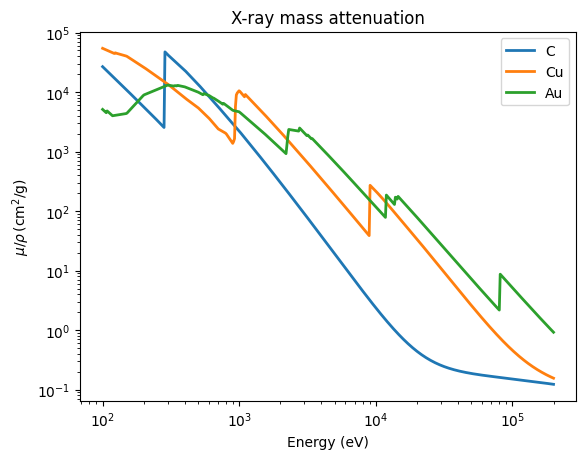

In [30]:
# import xraydb
from xraydb import mu_elam

# define energy range in eV
energy = np.exp(np.linspace(np.log(100), np.log(200000), 500))

# Plot the mass attenuation coefficient for three different elements
plt.figure()
for elem in ('C', 'Cu', 'Au'):
    mu = mu_elam(elem, energy)
    plt.plot(energy, mu, label=elem, linewidth=2)
 
plt.title('X-ray mass attenuation')
plt.xlabel('Energy (eV)')
plt.ylabel(r'$\mu/\rho \rm\, (cm^2/g)$')
plt.legend()
plt.yscale('log')
plt.xscale('log')

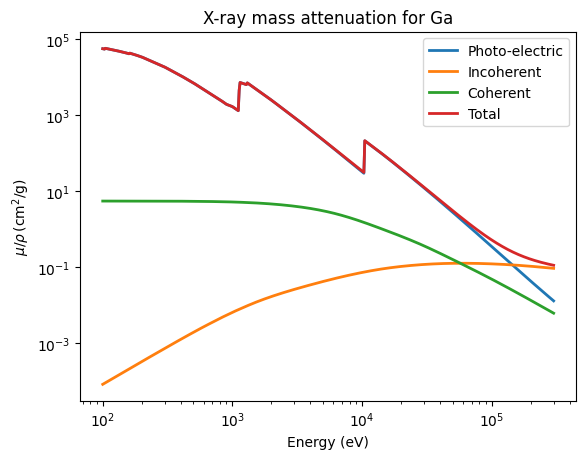

In [31]:
from xraydb import mu_elam , atomic_symbol

energy = np.exp(np.linspace(np.log(100), np.log(300000), 500))  # energy in eV
      
elem = 'Ga'
mu_total = mu_elam(elem, energy, kind='total')
mu_photo = mu_elam(elem, energy, kind='photo')
mu_incoh = mu_elam(elem, energy, kind='incoh')
mu_coher = mu_elam(elem, energy, kind='coh')

plt.figure()
plt.title('X-ray mass attenuation for %s' % elem)
plt.plot(energy, mu_photo, linewidth=2, label='Photo-electric')
plt.plot(energy, mu_incoh, linewidth=2, label='Incoherent')
plt.plot(energy, mu_coher, linewidth=2, label='Coherent')
plt.plot(energy, mu_total, linewidth=2, label='Total')

plt.xlabel('Energy (eV)')
plt.ylabel(r'$\mu/\rho \rm\, (cm^2/g)$')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.show()

## X-ray detection

Covered in detailed later. For now, we need to know that most detection schemes produce signals proportional to deposited dose. As a result, higher energy photons are intrinsically "brighter". Recent photon-counting detectors yield instead a photon count, independent of the photon energy.

In general X-ray detectors have some level of blurring, which is most conveniently described by the concept of point-spread function (PSF).  

## X-ray sources
### X-ray tubes

Coolidge tubes and rotating anodes generate X-ray through collision with a solid target of electrons emitted thermally and accelerated in a strong electric field. 

### Synchrotron radiation

Synchrotron radiation is emitted by relativistic electrons accelerating in the direction transverse to their velocity, most commonly under the effect of a magnetic field. The relativistic effects concentrate the radiation in a small forward cone. 

{cite}`xdb2009, AlsNielsen2011, Attwood2000soft`

### The effect of source size in X-ray imaging

The measured image is a convolution of the ideal image with the demagnified image of the source on the detector. Source blurring goes from negligible or dominant depending on the geometry and detector properties. 




### The effect of polychromaticity in X-ray imaging

The measured image is a convolution of the ideal image with the demagnified image of the source on the detector. Source blurring goes from negligible or dominant depending on the geometry and detector properties. 

In [2]:
# Idea to illustrate the effect of beam hardening
# Simulate the radiograph of a sample made of a few different materials
# a) in the case of a monochromatic incident illumination (20 keV)
# b) in the case where the spectrum is a Gaussian distribution centered at 20 keV
# and with sigma=4 keV

```{bibliography}
:style: unsrt
:filter: docname in docnames
```